<a href="https://colab.research.google.com/github/hajerFrigui/Restaurent_Recommender_Model/blob/master/Restaurent_Recommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt install gdal-bin python-gdal python3-gdal
!apt install python3-rtree
!pip install git+git://github.com/geopandas/geopandas.git
!pip install descartes
!pip install folium
!pip install plotly_express



Reading package lists... Done
Building dependency tree       
Reading state information... Done
gdal-bin is already the newest version (2.2.3+dfsg-2).
python-gdal is already the newest version (2.2.3+dfsg-2).
python3-gdal is already the newest version (2.2.3+dfsg-2).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3-rtree is already the newest version (0.8.3+ds-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
  Cloning git://github.com/geopandas/geopandas.git to /tmp/pip-req-build-db7w6r31
  Running command git clone -q git://github.com/geopandas/geopandas.git /tmp/pip-req-build-db7w6r31


In [ ]:
import pandas as pd
import numpy as np
import geopandas as pgd

import matplotlib.pyplot as plt
import seaborn as sns

import folium

import plotly
import plotly.offline as py
import plotly.graph_objs as go
import plotly_express as px

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score



In [ ]:
from google.colab import files
upload = files.upload()

Saving zomato.csv to zomato (1).csv


In [ ]:
df = pd.read_csv('zomato.csv', encoding = "ISO-8859-1")
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,80,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",105,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",170,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,120,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [ ]:
df.shape

(9551, 21)

** Data Analysis**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



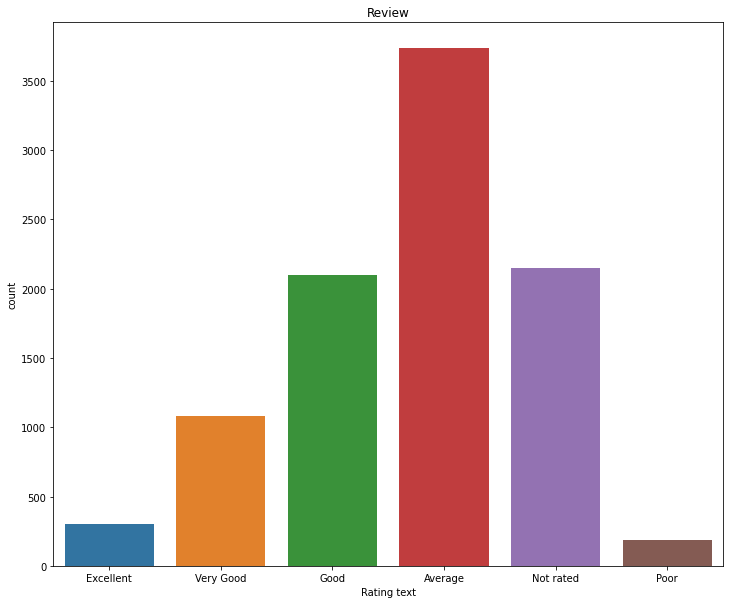

In [168]:
#
fig ,ax=plt.subplots(figsize=(12,10))
sns.countplot(df['Rating text'], ax=ax)
plt.title('Review')
plt.show()

In [ ]:
top_restaurents = df.sort_values(by='Votes', ascending=False)[:30]
top_restaurents.head()

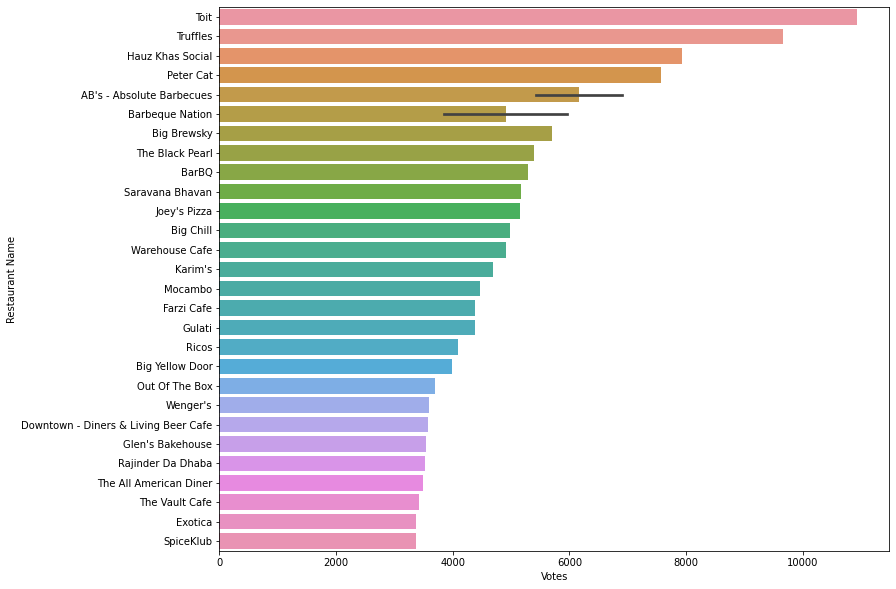

In [169]:
fig, ax = plt.subplots(figsize=(12,10))
sns.barplot(x='Votes', y='Restaurant Name', data=top_restaurents, ax=ax)
plt.show()

In [ ]:
#connect to mapBox/ use it to create the map 
px.set_mapboxaccess_token('pk.eyJ1IjoiaGFqZXJmcmlndWkyMyIsImEiOiJja3V0cmduOWowbXhqMnZsdDFoODFkYXRmIn0.IyjHTH67Y_hI2a0Djn9M8Q')
#create map , use our dataframe df , every point has  coordonnes(lon,lat) on the map ,size of point depend on the feature votes  /
px.scatter_mapbox(df,lat='Latitude',lon='Longitude',color='Rating text',size='Votes', size_max=30,zoom=3,width=1200,height=800)

In [145]:
#select from df the restaurents that exsit in Bangalore and put them in a dataframe 
ÛÁstanbul_city_restaurents = df[df.City == 'ÛÁstanbul']
px.scatter_mapbox(ÛÁstanbul_city_restaurents, lat='Latitude',lon='Longitude',color='Rating text',size='Votes', size_max=15,zoom=10,width=1200,height=800)

Find the optimum number of clusters K (2 methods : elbow method or silhouette)

In [ ]:
#sil method
from sklearn.metrics import silhouette_score


#Selecting a subset of columns found in a list from ÛÁstanbul dataframe 
coords = ÛÁstanbul_city_restaurents[['Longitude','Latitude']]

sil = []
kmax = 50
for k in range (2, kmax+1):
  #create the model then put in ith coords
  kmeans = KMeans(n_clusters = k).fit(coords)
  labels = kmeans.labels_
  sil.append(silhouette_score(coords, labels, metric ='euclidean'))

  #should choose the k which have the highest metric

**KMeans Model**



In [161]:
kmeans = KMeans(n_clusters = 3, init ='k-means++')
#1)regrouper les points(coordonnes des retaurents in Bangalore ) en des classes
kmeans.fit(coords)

labels = kmeans.labels_ 
#print('for K =2 the silhouette_score is ',silhouette_score(coords,y,metric='euclidien'))

In [162]:
#add a new column cluster in ÛÁstanbul_city_restaurents -> to  any cluster every restaurent belong (labels:0,1,2,...)!
ÛÁstanbul_city_restaurents['cluster'] = kmeans.predict(ÛÁstanbul_city_restaurents[['Longitude','Latitude']])

top_ÛÁstanbul_city_restaurents = ÛÁstanbul_city_restaurents.sort_values(by=['Votes'],ascending=False)

top_ÛÁstanbul_city_restaurents.head()                                              

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,cluster
9537,5904116,J'adore Chocolatier,208,ÛÁstanbul,"AsmalÛ±mescit Mahallesi, ÛÁstiklal Caddesi, Em...",AsmalÛ±mescit,"AsmalÛ±mescit, ÛÁstanbul",28.976127,41.033002,Desserts,50,Turkish Lira(TL),No,No,No,No,2,4.7,Dark Green,Excellent,1311,1
9544,5915547,Karakí_y Gí_llí_oÛôlu,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977636,41.022904,"Desserts, Bí_rek",40,Turkish Lira(TL),No,No,No,No,2,4.7,Dark Green,Excellent,1305,1
9538,5901782,Starbucks,208,ÛÁstanbul,"Bebek Mahallesi, Cevdetpaôa Caddesi, No 30/A,...",Bebek,"Bebek, ÛÁstanbul",29.043734,41.077696,Cafe,30,Turkish Lira(TL),No,No,No,No,2,4.9,Dark Green,Excellent,1042,0
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",105,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034,2
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,120,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901,0


In [163]:
 px.scatter_mapbox(top_ÛÁstanbul_city_restaurents, lat="Latitude",lon="Longitude", color="cluster", size="Votes", zoom=10, width=1200,height=800, hover_data=['Restaurant Name', 'Longitude', 'Latitude'])

Prediction Function 

give list of restaurents in Bangalore and coordinates of user to predict the best and nearst restaurents to him

In [164]:
def recommend_restaurents(df, longitude,latitude):
    cluster = kmeans.predict(np.array([longitude,latitude]).reshape(1,-1))[0]
    print (cluster)
    return df[df['cluster']==cluster].iloc[0:5][['Restaurant Name', 'Longitude','Latitude']]

Test

In [165]:
#1)prepare data test
test_df = pd.DataFrame({ 'user':1, 'longitude':28.9761	, 'latitude':41.033},index=[0])
#convert this list into a dataframe and give it an index
test_df

,user,longitude,latitude
0,1,28.9761,41.033


In [166]:
recommend_restaurents(top_ÛÁstanbul_city_restaurents, user1.longitude, user1.latitude)

1


,Restaurant Name,Longitude,Latitude
9537,J'adore Chocolatier,28.976127,41.033002
9544,Karakí_y Gí_llí_oÛôlu,28.977636,41.022904
9539,Valonia,29.002896,41.044813
9545,Baltazar,28.981103,41.025785
9546,NamlÛ± Gurme,28.977392,41.022793


In [167]:
#2)Test
#display restaurents according to user coordinates

fig = px.scatter_mapbox(recommend_restaurents(top_ÛÁstanbul_city_restaurents, user1.longitude, user1.latitude), lat="Latitude",lon="Longitude", zoom=10, width=1200,height=800, hover_data=['Restaurant Name', 'Longitude', 'Latitude'])

#add position of the user to the map
fig.add_scattermapbox(lat=user1["latitude"], lon=user1["longitude"]).update_traces(dict(mode='markers', marker = dict(size=20)))

1
